
# Digit classification with DNN
An example of classification using a deep neural network for the famous MNIST dataset


## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN  
 - Implementation with Keras 


The MNIST dataset (Modified National Institute of Standards and Technology).  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## To do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Import required libraries

In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from utils import *
#importing pylot additionally for subplotting
#import pyploy as plt

## Step 2 - Load MNIST data



###  <font color='red'>Task 1: Load MNIST dataset from keras.datasets module </font>

In [34]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x sub train/test is the image and pixel information
#y sub train/test is the label of a particular picture i.e. 7
#hence y sub train/test is the output

In [84]:
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Pre-process and prepare the data

###  <font color='red'> Task 2: Normalize the data <font>
* For most image data, the pixel values are integers with values between 0 and 255.
* Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

In [85]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0.0, max=1.0
After normalization  : Min=0.0, max=1.0


### <font color='red'> Task 3: Plot sample images from the dataset <font>
1. plot 2 random images from "x_train" along with their labels

[7, 1]
7 1
Associated label with the rand. num. 7  is: 3
The image associated with this label is:


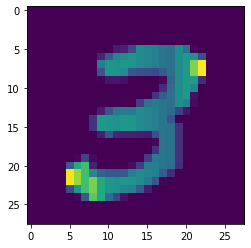

associated label with the rand. num. 1  is: 0
The image associated with this label is:


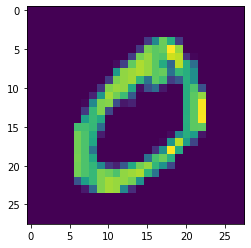

In [127]:
#defining the subplot
#pyplot.subplot(330 + 1 + i)
#print(x_train[1])

randomlist1 = random.sample(range(0,9), 2)
print(randomlist1)
i = randomlist1
print(i[0],i[1])
print("Associated label with the rand. num.", i[0], " is:", y_train[i[0]])
print("The image associated with this label is:")
plt.imshow(x_train[i[0]])
plt.show()
#pyplot.imprint("associated label is:", y_train[i[0], i[1]])
print("associated label with the rand. num.", i[1], " is:", y_train[i[1]])
print("The image associated with this label is:")
plt.imshow(x_train[i[1]])
plt.show()


## Step 4 - Create model

In [87]:
# define two hidden layers, with 100 neurons each
hidden1     = 100
hidden2     = 100

# define model
model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### Model Architecture:

<img style="float: left;" width="600" src="mnist_dnn.png">

## Step 5 - Train the model

In [88]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

#batch_size sets how many rows of data are used for each step of
#the loss function, i.e. stochastic gradient descent
#verbose set to true prints a log during training, i.e. for 
#debugging purposes 

Epoch 1/16
118/118 [==============================] - 1s 4ms/step - loss: 0.7042 - accuracy: 0.8189 - val_loss: 0.2946 - val_accuracy: 0.9160
Epoch 2/16
118/118 [==============================] - 0s 4ms/step - loss: 0.2587 - accuracy: 0.9253 - val_loss: 0.2219 - val_accuracy: 0.9358
Epoch 3/16
118/118 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.9404 - val_loss: 0.1853 - val_accuracy: 0.9429
Epoch 4/16
118/118 [==============================] - 1s 4ms/step - loss: 0.1626 - accuracy: 0.9509 - val_loss: 0.1591 - val_accuracy: 0.9529
Epoch 5/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1356 - accuracy: 0.9596 - val_loss: 0.1367 - val_accuracy: 0.9587
Epoch 6/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9667 - val_loss: 0.1249 - val_accuracy: 0.9635
Epoch 7/16
118/118 [==============================] - 0s 4ms/step - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.1126 - val_accuracy: 0.9661
Epoch 

## Step 6 - Evaluate
### 6.1: Evaluation

### <font color='red'> Task 4: Evaluate your model <font>

In [89]:
# given x_test and y_test, evaluate your model using keras model.evaluate module
#accuracy = model.evaluate(x_test, y_test)

score = model.evaluate(x_test, y_test) 
#score[0] = accuracy
#score[1] = loss

313/313 [==============================] - 0s 748us/step - loss: 0.0957 - accuracy: 0.9727


In [91]:
print('Test loss     :', (score[0]*100), '%')
print('Test accuracy :', (score[1]*100), '%')
model.save('Model_0_1')

Test loss     : 9.567812830209732 %
Test accuracy : 97.26999998092651 %
INFO:tensorflow:Assets written to: Model_0_1\assets


### 6.2 - Plot history

### <font color='red'> Task 5: Plot learning curves <font>
use the "history" variable created above and plot accuracy and loss curves
1. plot train and val accuracy plot
2. plot train and val loss plot

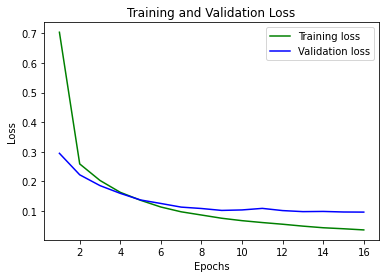

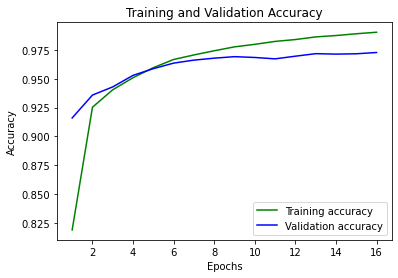

In [92]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range (1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'g', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 6.3 - Plot results

### <font color='red'> Task 6: Plot sample inference results <font>
feed 5 random images from "x_test" to your trained model and print inference results

Random generated numbers list:
4 0 5 6 7
Label associated with index 4 is:  4
Corresponding Image:


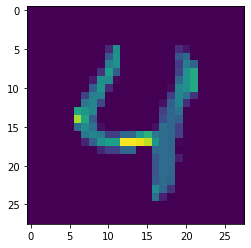

Label associated with index 0 is:  7
Corresponding Image:


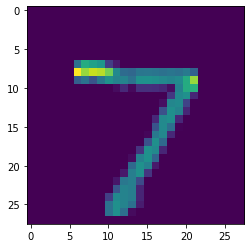

Label associated with index 5 is:  1
Corresponding Image:


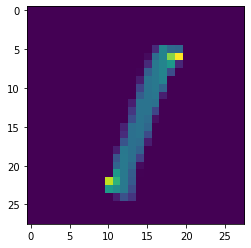

Label associated with index 6 is:  4
Corresponding Image:


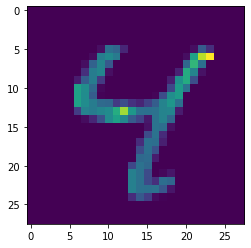

Label associated with index 7 is:  9
Corresponding Image:


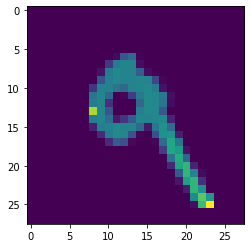

In [136]:
import random
#loading the data to the new model Model_0_2 
Model_0_2 = tf.keras.models.load_model('Model_0_1')
predictions = Model_0_2.predict([x_test])

#Generating a random vector of 5 elements between 0-9 
randomlist = random.sample(range(0,9), 5)
z = randomlist
print("Random generated numbers list:")
print(z[0], z[1], z[2], z[3], z[4])

#iterating through the random vector indeces and
#printing the predictions (elements) and the associated image
for i in range (0, 5):
 print ("Label associated with index", z[i], "is: ", np.argmax(predictions[z[i]]))
 #print(np.argmax(predictions[z[i]]))
 print ("Corresponding Image:")
 plt.imshow(x_test[z[i]])
 plt.show()



### <font color='red'> Task 7: Print confusion matrix <font>
take y_test and y_pred and print the confusion matrix using sklearn

In [143]:
#y_pred here is simply the predictions
import sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot = True) 


ModuleNotFoundError: No module named 'sklearn'

<font color='blue'>
    <div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>
<font>